# Introduction

## Motivation

The 2015 European migration crisis was a significant event that had a profound impact on political landscapes across the continent. Understanding how this crisis influenced public sentiment towards the EU is crucial for comprehending the broader political consequences, including shifts in voter preferences, party politics, and policy-making.

Using the Manifesto Project Database, we hope investigate how the 2015 migrations affected the support level towards EU over time by examining various factors such as the percentage of votes gained by each party and the advocacy for the restriction of immigration process.

## Goal

Research question: How did the 2015 european migration affect the support level towards EU?

# Data Cleaning

We performed the following steps to prepare our data for analysis:

1. Select relevant columns
2. Convert dataframe column types
3. Handle missing values

In [1]:
import pandas as pd

In [2]:
#load the data
df = pd.read_csv('mp.csv', low_memory=False)
df

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
0,11,Sweden,0,0.0,17/09/1944,194409,11220,Communist Party of Sweden,SKP,20,...,NaN,NaN,NaN,9.600,1.900,1.900,0.000,1.900,2023a,JN1LZH
1,11,Sweden,0,0.0,17/09/1944,194409,11320,Social Democratic Labour Party,SAP,30,...,NaN,NaN,NaN,-37.800,3.300,2.200,33.400,5.600,2023a,CMR7F6
2,11,Sweden,0,0.0,17/09/1944,194409,11420,People’s Party,FP,40,...,NaN,NaN,NaN,9.500,3.200,6.400,14.300,1.600,2023a,Z6OL6C
3,11,Sweden,0,0.0,17/09/1944,194409,11620,Right Party,NaN,60,...,NaN,NaN,NaN,28.000,1.800,22.800,10.600,0.000,2023a,YMKVN2
4,11,Sweden,0,0.0,17/09/1944,194409,11810,Agrarian Party,NaN,80,...,NaN,NaN,NaN,23.810,0.000,19.048,0.000,4.762,2023a,U4SCRD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5084,181,South Africa,0,0.0,08/05/2019,201905,181510,African Christian Democratic Party,ACDP,50,...,0.0,5.000,0.0,12.500,0.833,7.500,14.167,0.000,2023a,HSQT6Y
5085,181,South Africa,0,0.0,08/05/2019,201905,181520,African Transformation Movement,ATM,50,...,0.0,1.042,0.0,-6.771,3.385,1.042,22.135,1.562,2023a,B6QCSE
5086,181,South Africa,0,0.0,08/05/2019,201905,181710,Freedom Front Plus,FF+,70,...,0.0,3.497,0.0,19.580,0.699,10.664,11.364,0.000,2023a,OS725O
5087,181,South Africa,0,0.0,08/05/2019,201905,181910,Inkatha Freedom Party,IFP,90,...,0.0,3.289,0.0,-6.579,0.658,0.658,28.947,0.000,2023a,XKM7J7


#### Selecting relevant columns

In [3]:
df = df[["countryname", "edate", "parfam", "eumember", "pervote", "per108", "per109", "per110", "per607", "per601_2", "per602_2"]]

In [4]:
#select countries that are EU members
eu_df = df[df['eumember']==10]
eu_df

,countryname,edate,parfam,eumember,pervote,per108,per109,per110,per607,per601_2,per602_2
92,Sweden,21/09/1998,10,10.0,4.500,0.000,0.000,9.722,0.000,NaN,NaN
93,Sweden,21/09/1998,20,10.0,11.990,0.000,0.000,3.323,0.000,NaN,NaN
94,Sweden,21/09/1998,30,10.0,36.390,4.688,0.000,0.000,0.000,NaN,NaN
95,Sweden,21/09/1998,40,10.0,4.720,3.571,0.000,0.000,0.000,NaN,NaN
96,Sweden,21/09/1998,50,10.0,11.770,0.599,0.000,0.000,0.000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4602,Slovenia,03/06/2018,40,10.0,5.105,1.261,0.000,0.840,0.000,0.000,0.00
4603,Slovenia,03/06/2018,40,10.0,9.748,4.724,0.000,0.000,0.000,0.000,0.00
4604,Slovenia,03/06/2018,50,10.0,7.159,1.153,0.000,0.040,0.119,1.312,0.04
4605,Slovenia,03/06/2018,70,10.0,4.173,0.000,5.556,0.794,0.000,3.968,0.00


#### Convert dataframe column types

In [5]:
eu_df['edate'] = pd.to_datetime(eu_df['edate'], infer_datetime_format=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_7764\3173083268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_df['edate'] = pd.to_datetime(eu_df['edate'], infer_datetime_format=True)


#### Replace missing values

In [6]:
eu_df.fillna(0,inplace=True)
eu_df

C:\Users\asus\AppData\Local\Temp\ipykernel_7764\862182475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu_df.fillna(0,inplace=True)


,countryname,edate,parfam,eumember,pervote,per108,per109,per110,per607,per601_2,per602_2
92,Sweden,1998-09-21,10,10.0,4.500,0.000,0.000,9.722,0.000,0.000,0.00
93,Sweden,1998-09-21,20,10.0,11.990,0.000,0.000,3.323,0.000,0.000,0.00
94,Sweden,1998-09-21,30,10.0,36.390,4.688,0.000,0.000,0.000,0.000,0.00
95,Sweden,1998-09-21,40,10.0,4.720,3.571,0.000,0.000,0.000,0.000,0.00
96,Sweden,1998-09-21,50,10.0,11.770,0.599,0.000,0.000,0.000,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...
4602,Slovenia,2018-06-03,40,10.0,5.105,1.261,0.000,0.840,0.000,0.000,0.00
4603,Slovenia,2018-06-03,40,10.0,9.748,4.724,0.000,0.000,0.000,0.000,0.00
4604,Slovenia,2018-06-03,50,10.0,7.159,1.153,0.000,0.040,0.119,1.312,0.04
4605,Slovenia,2018-06-03,70,10.0,4.173,0.000,5.556,0.794,0.000,3.968,0.00


# Exploratory Data Analysis (EDA)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\Users\asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Visualizing the percentage of votes gained by each party from 2008 to 2015

In [8]:
#select year from 2008 to 2015
mask = (eu_df['edate']>'2008-01-01') & (eu_df['edate']<'2015-12-31')
pervote = eu_df.loc[mask]

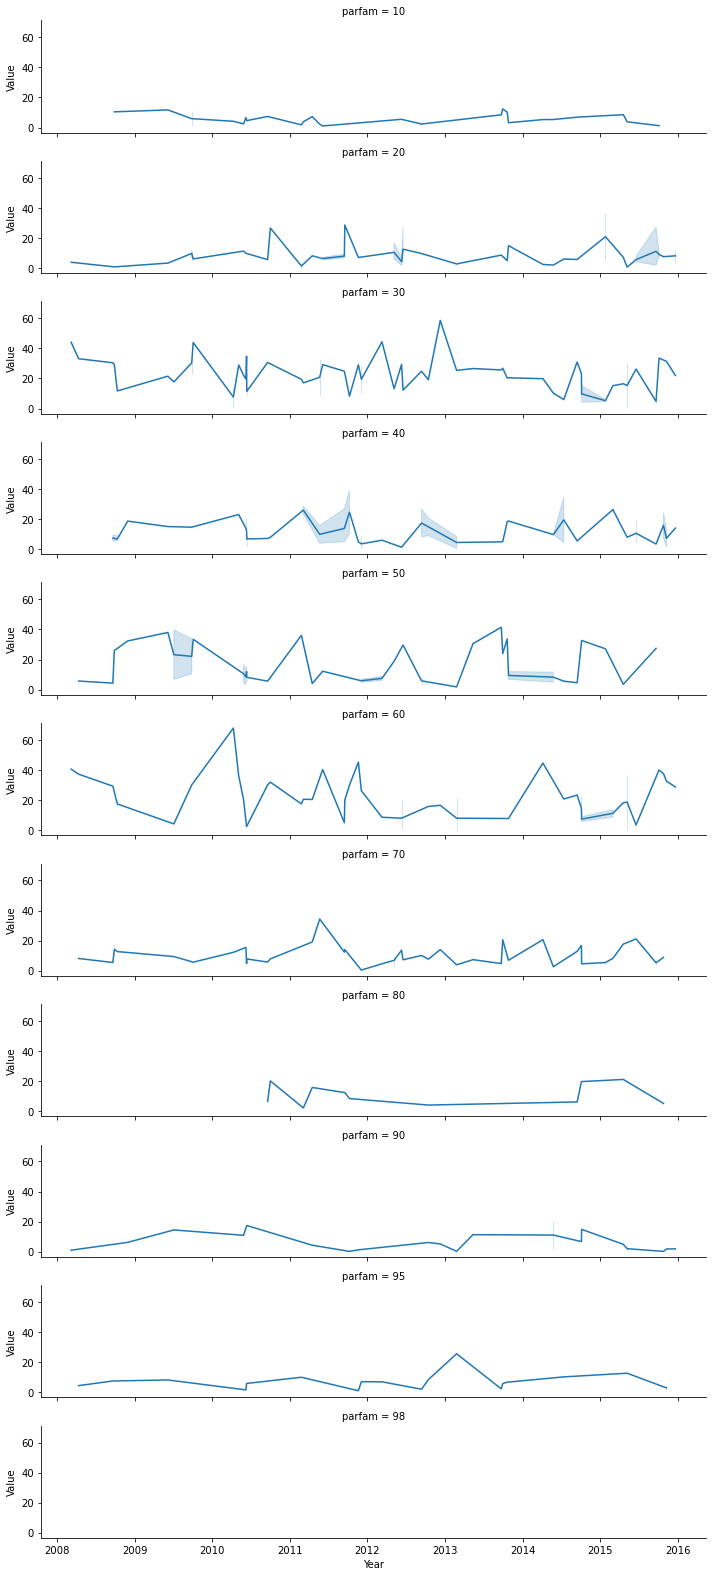

In [9]:
# Creating a line graphs to see the change in percentage of votes gained by each party over the years. 
g = sns.FacetGrid(pervote, row="parfam", height=2, aspect=5)
g.map(sns.lineplot, "edate", "pervote")
g.set_axis_labels('Year', 'Value')

The graph above shows the fluctuation of the support for 10 political parties from 2008 to 2016. While parfam 20 (socialist or other left parties), 30 (social democratic parties), and 40 (liberal parties) are considered to be left wing political parties, parfam 60 (conservative parties) and 70 (nationalist and radical right parties) are considered right wing political parties. 

#### Comparing the percentage of support for statements that advocate the restriction of immigration process after 2018

In [10]:
# group by date and excluse rows where per601_2 column contains values that are 0. 
per601 = eu_df[eu_df['per601_2'] != 0.0].groupby('edate').mean()

In [11]:
from matplotlib.widgets import Slider

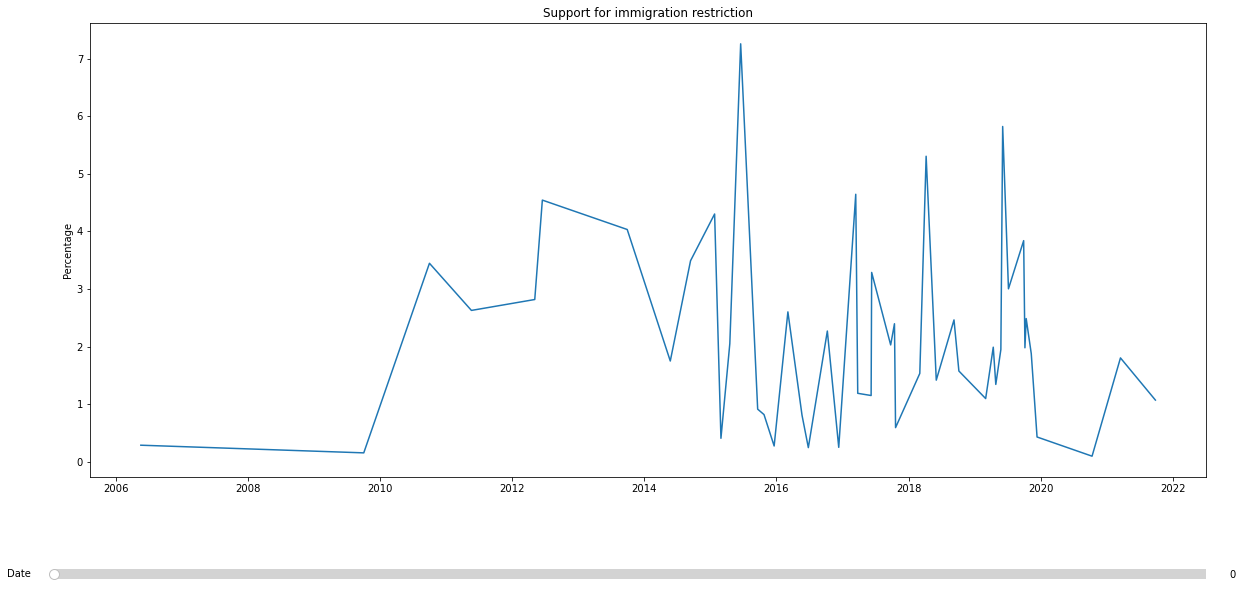

In [15]:
# visualize the average support rate for immigration restriction

fig, ax = plt.subplots(figsize=(20, 10))
plt.subplots_adjust(bottom=0.25)

line, = plt.plot(per601.index, per601['per601_2'])
plt.ylabel('Percentage')
plt.title('Support for immigration restriction')

ax_slider = plt.axes([0.1, 0.1, 0.8, 0.03], facecolor='lightgray')
slider = Slider(ax_slider, 'Date', 0, len(per601.index) - 1, valinit=0, valstep=1)

# update the displayed data based on the slider value
def update(val):
    index = int(slider.val)
    line.set_xdata(per601.index[index:])
    line.set_ydata(per601['per601_2'][index:])
    ax.set_xlim(per601.index[index], per601.index[index + 10])  # Show a range of 10 points
    ax.set_ylim(min(per601['per601_2'][index:index + 10]), max(per601['per601_2'][index:index + 10]))
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()

From 2006 to 2015, ther's a gradual increase in the support for immigration restriction like migration quotas and 'the boat is full' argument. 

# Conclusion

## Findings

## Limitations

# References

Lehmann,Pola/Franzmann,Simon/Burst,Tobias/Regel,Sven/Riethmüller,Felicia /Volkens,Andrea/Weßels,Bernhard/Zehnter,Lisa(2023):TheManifestoDataCollection.ManifestoProject(MRG/CMP/MARPOR).Version2023a.Berlin:WissenschaftszentrumBerlinfürSozialforschung(WZB)/Göttingen: InstitutfürDemokratieforschung (IfDem). https://doi.org/10.25522/manifesto.mpds.2023a